In [1]:
import numpy as np
import sys

sys.path.append("../Functions/")
sys.path.append("../Classes/")
import QuasarModelFunctions as QMF
import Amoeba
from astropy.io import fits
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from skimage.transform import rescale
import astropy.nddata
import glob

plt.style.use("plot_style_large_font.txt")

<ipython-input-2-7dc4245b7acc>:34: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)


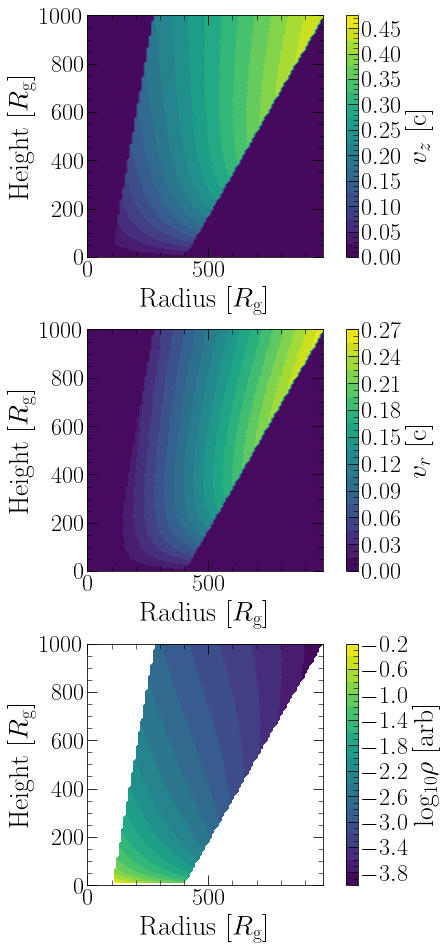

In [2]:
zmax = 1000  # R_g
mexp = 8.0
sl_1_rlaunch = 100  # R_g
sl_2_rlaunch = 400
sl_1_theta = 10  # deg
sl_2_theta = 30
sl_1_char_dist = 1000  # R_g
sl_2_char_dist = 400
sl_1_asy_vel = 0.4  # v/c
sl_2_asy_vel = 0.7

testingBLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)


SL1 = Amoeba.Streamline(
    sl_1_rlaunch, sl_1_theta, zmax, sl_1_char_dist, mexp, sl_1_asy_vel
)
SL2 = Amoeba.Streamline(
    sl_2_rlaunch, sl_2_theta, zmax, sl_2_char_dist, mexp, sl_2_asy_vel
)

testingBLR.Add_SL_bounded_region(SL1, SL2)
R, Z = np.meshgrid(testingBLR.r_vals, testingBLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (testingBLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r"$v_{z}$ [c]")

conts2 = ax[1].contourf(R, Z, (testingBLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r"$v_{r}$ [c]")


conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r"log$_{10} \rho$ [arb]")
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.subplots_adjust(hspace=0.3)
# fig.savefig("BLRGeometry.pdf")
plt.show()

<ipython-input-3-9901ab62ab99>:13: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(x_vals, y_vals, np.log10(projection))


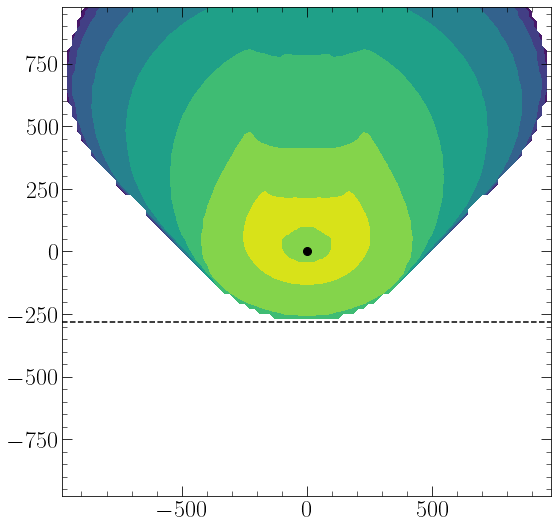

In [3]:
inc_ang = 45
projection = testingBLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi / 180
x_vals = np.linspace(-testingBLR.max_r, testingBLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-testingBLR.max_r, testingBLR.max_r, np.size(projection, 1))

baseline = (sl_2_rlaunch) * np.cos(inc_ang)

fig, ax = plt.subplots(figsize=(10, 9))
ax.plot([0], [0], "k.", markersize=16)
ax.plot(
    [-testingBLR.max_r, testingBLR.max_r], [-baseline, -baseline], "k--", markersize=1
)
# Once inc_ang > SL2_theta, BLR should be above this line!
ax.contourf(x_vals, y_vals, np.log10(projection))
ax.set_aspect(1)
plt.show()

<ipython-input-4-1ed52fa78b8c>:7: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(rescaled_projection), 40)


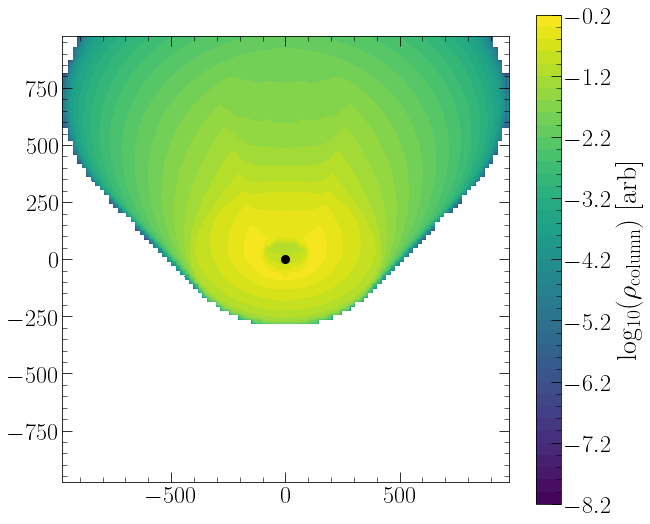

In [4]:
rescaled_projection = rescale(projection, 30)
x_vals = np.linspace(
    -testingBLR.max_r, testingBLR.max_r, np.size(rescaled_projection, 0)
)
y_vals = np.linspace(
    -testingBLR.max_r, testingBLR.max_r, np.size(rescaled_projection, 1)
)
fig, ax = plt.subplots(figsize=(10, 9))
ax.plot([0], [0], "k.", markersize=16)
# ax.plot([-testingBLR.max_r,testingBLR.max_r], [-baseline,-baseline], 'k--', markersize=1)
contours = ax.contourf(x_vals, y_vals, np.log10(rescaled_projection), 40)
cbar = plt.colorbar(contours, ax=ax, label=r"log$_{10} (\rho_{\rm{column}})$  [arb]")
ax.set_aspect(1)
# fig.savefig("BLRColumnDensity.pdf")
plt.show()

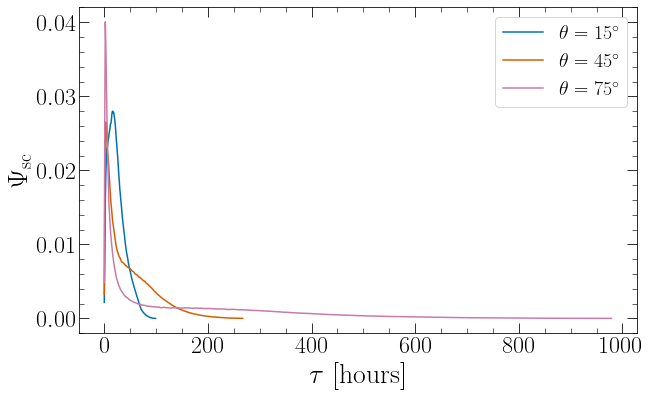

In [5]:
theta1 = 15
theta2 = 45
theta3 = 75

TF1 = testingBLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2 = testingBLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3 = testingBLR.Scattering_BLR_TF(theta3, scaleratio=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1, label=r"$\theta = " + str(theta1) + r"^{\circ}$")
ax.plot(TF2, label=r"$\theta = " + str(theta2) + r"^{\circ}$")
ax.plot(TF3, label=r"$\theta = " + str(theta3) + r"^{\circ}$")

ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()

In [6]:
vel_centroid = -0.5  # units c
delta_vel = 0.5  # +/- units c
inc_ang = 75  # deg
scalefactor = 30
rescale_projection = rescale(testingBLR.Project_BLR_density(inc_ang), scalefactor)
rescale_vel_slice = rescale(
    testingBLR.Project_BLR_velocity_slice(inc_ang, vel_centroid, delta_vel), scalefactor
)

/usr/local/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<ipython-input-7-c68e7f51b47d>:8: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(x_vals, y_vals, np.log10(rescale_projection), 20, alpha=0.2)


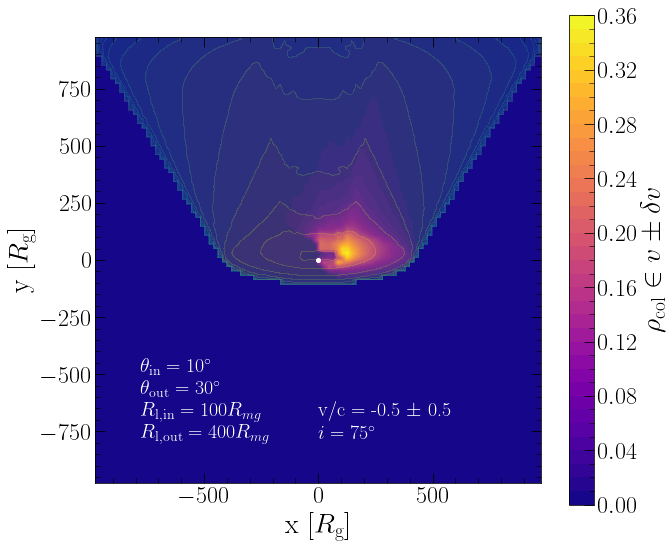

In [7]:
xalign1 = -0.8 * np.max(x_vals)
xalign2 = 0
yalign = -0.5 * np.max(y_vals)
deltay = 0.1 * np.max(y_vals)

fig, ax = plt.subplots(figsize=(10, 9))
contours = ax.contourf(x_vals, y_vals, rescale_vel_slice, 40, cmap="plasma")
ax.contourf(x_vals, y_vals, np.log10(rescale_projection), 20, alpha=0.2)
cbar = plt.colorbar(contours, ax=ax, label=r"$\rho_{\rm{col}} \in v \pm \delta v$")
ax.plot([0], [0], "w.-", markersize=8)
ax.set_xlabel(r"x [$R_{\rm{g}}$]")
ax.set_ylabel(r"y [$R_{\rm{g}}$]")

ax.text(
    xalign1,
    yalign - 0 * deltay,
    r"$\theta_{\rm{in}} = " + str(sl_1_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 1 * deltay,
    r"$\theta_{\rm{out}} = " + str(sl_2_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 2 * deltay,
    r"$R_{\rm{l, in}} = " + str(sl_1_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 3 * deltay,
    r"$R_{\rm{l, out}} = " + str(sl_2_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)


ax.text(
    xalign2,
    yalign - 2 * deltay,
    r"v/c = " + str(vel_centroid) + r" $\pm$ " + str(delta_vel),
    color="white",
    fontsize=20,
)
ax.text(
    xalign2,
    yalign - 3 * deltay,
    r"$i = " + str(inc_ang) + r"^{\circ}$ ",
    color="white",
    fontsize=20,
)
ax.set_aspect(1)
# fig.savefig("ReceedingVelSliceEO.pdf")
plt.show()

In [8]:
v_selected_TF = testingBLR.Scattering_Vel_Line_BLR_TF(
    inc_ang, vel_centroid, delta_vel, scaleratio=15
)
print("m_exp =", testingBLR.mass_exp)
print("max_z =", testingBLR.max_z)
print("r_res =", testingBLR.r_res)
print("z_res =", testingBLR.z_res)
print("max_r =", testingBLR.max_r)

/usr/local/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


m_exp = 8.0
max_z = 1000
r_res = 10
z_res = 10
max_r = 977


In [9]:
vel_select = testingBLR.Check_Line_Contamination(inc_ang, 300, 580, 600, redshift=1)
if vel_select is not False:
    v_selected_TF = testingBLR.Scattering_Vel_Line_BLR_TF(
        inc_ang, vel_select[0], vel_select[1], scaleratio=40
    )
    print(str(vel_select[0])[:5] + " +/- " + str(vel_select[1])[:5])
else:
    print("no selections made")

/Users/henrybest/PythonStuff/Code/Amoeba/Amoeba/Notebooks/../Functions/QuasarModelFunctions.py:1133: RuntimeWarning: invalid value encountered in multiply
  LOS_grid *= density_mask
/Users/henrybest/PythonStuff/Code/Amoeba/Amoeba/Notebooks/../Functions/QuasarModelFunctions.py:1143: RuntimeWarning: invalid value encountered in multiply
  LOS_grid *= density_mask


0.016 +/- 0.016


<ipython-input-10-7ad48a9901e8>:11: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(x_vals, y_vals, np.log10(rescale_projection), 20, alpha=0.2)


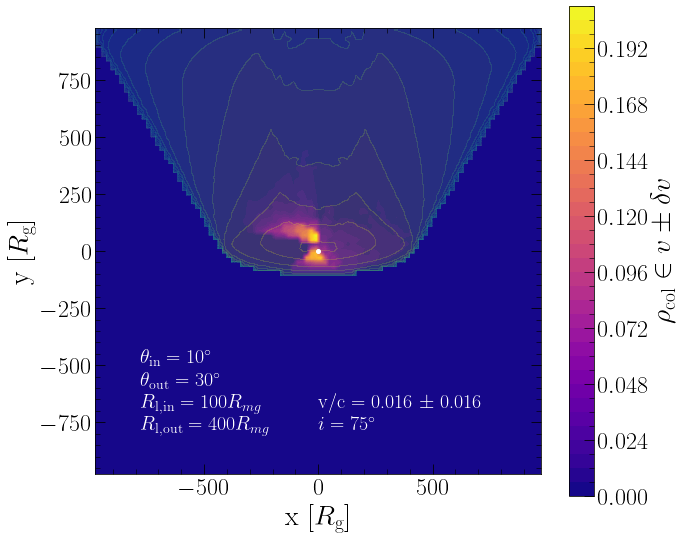

In [10]:
xalign1 = -0.8 * np.max(x_vals)
xalign2 = 0
yalign = -0.5 * np.max(y_vals)
deltay = 0.1 * np.max(y_vals)

v_slice = testingBLR.Project_BLR_velocity_slice(inc_ang, vel_select[0], vel_select[1])
rescale_v_slice = rescale(v_slice, 30)

fig, ax = plt.subplots(figsize=(10, 9))
contours = ax.contourf(x_vals, y_vals, rescale_v_slice, 40, cmap="plasma")
ax.contourf(x_vals, y_vals, np.log10(rescale_projection), 20, alpha=0.2)
cbar = plt.colorbar(contours, ax=ax, label=r"$\rho_{\rm{col}} \in v \pm \delta v$")
ax.plot([0], [0], "w.-", markersize=8)
ax.set_xlabel(r"x [$R_{\rm{g}}$]")
ax.set_ylabel(r"y [$R_{\rm{g}}$]")

ax.text(
    xalign1,
    yalign - 0 * deltay,
    r"$\theta_{\rm{in}} = " + str(sl_1_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 1 * deltay,
    r"$\theta_{\rm{out}} = " + str(sl_2_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 2 * deltay,
    r"$R_{\rm{l, in}} = " + str(sl_1_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 3 * deltay,
    r"$R_{\rm{l, out}} = " + str(sl_2_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)


ax.text(
    xalign2,
    yalign - 2 * deltay,
    r"v/c = " + str(vel_select[0])[:5] + r" $\pm$ " + str(vel_select[1])[:5],
    color="white",
    fontsize=20,
)
ax.text(
    xalign2,
    yalign - 3 * deltay,
    r"$i = " + str(inc_ang) + r"^{\circ}$ ",
    color="white",
    fontsize=20,
)
ax.set_aspect(1)

plt.show()

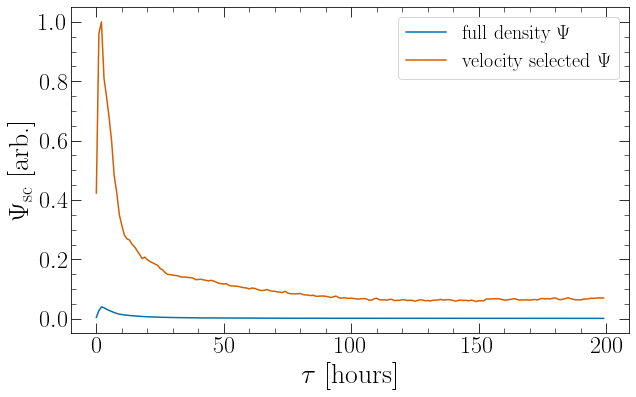

In [11]:
lim = 200

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF3[:lim], label=r"full density $\Psi$")
ax.plot(v_selected_TF[:lim] / np.max(v_selected_TF), label=r"velocity selected $\Psi$")

ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$ [arb.]")
ax.legend()

plt.show()

Adding another BLR region will overwrite anything it overlaps, but they are added to the existing r,z grids. First we will extend a grid with a second region that touches the first.

<ipython-input-12-59765fe1eced>:34: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)


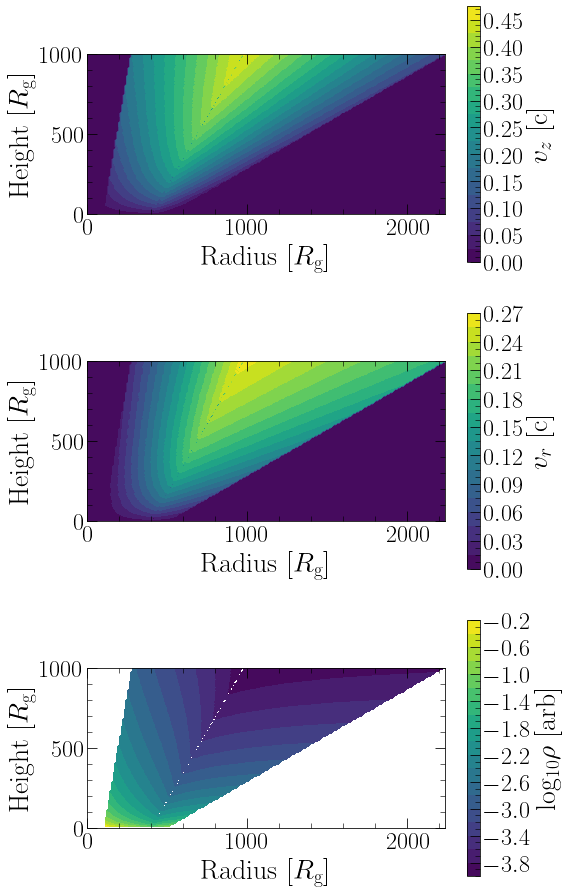

In [12]:
zmax = 1000  # R_g
mexp = 8.0

sl_3_rlaunch = 500
sl_3_theta = 60
sl_3_char_dist = 1000
sl_3_asy_vel = 0.3

testingBLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)


SL1 = Amoeba.Streamline(
    sl_1_rlaunch, sl_1_theta, zmax, sl_1_char_dist, mexp, sl_1_asy_vel
)
SL2 = Amoeba.Streamline(
    sl_2_rlaunch, sl_2_theta, zmax, sl_2_char_dist, mexp, sl_2_asy_vel
)
SL3 = Amoeba.Streamline(
    sl_3_rlaunch, sl_3_theta, zmax, sl_3_char_dist, mexp, sl_3_asy_vel
)

testingBLR.Add_SL_bounded_region(SL1, SL2)
testingBLR.Add_SL_bounded_region(SL2, SL3)

R, Z = np.meshgrid(testingBLR.r_vals, testingBLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (testingBLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r"$v_{z}$ [c]")

conts2 = ax[1].contourf(R, Z, (testingBLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r"$v_{r}$ [c]")


conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r"log$_{10} \rho$ [arb]")
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.show()

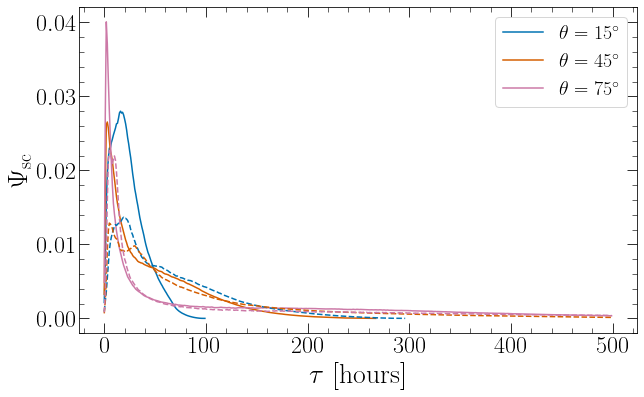

In [13]:
TF1_extra = testingBLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2_extra = testingBLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3_extra = testingBLR.Scattering_BLR_TF(theta3, scaleratio=15)

lim = 500


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1[:lim], label=r"$\theta = " + str(theta1) + r"^{\circ}$")
ax.plot(TF2[:lim], label=r"$\theta = " + str(theta2) + r"^{\circ}$")
ax.plot(TF3[:lim], label=r"$\theta = " + str(theta3) + r"^{\circ}$")

plt.gca().set_prop_cycle(None)  # reset color cycle
ax.plot(TF1_extra[:lim], "--")  # add new TFs to plot as dashed lines
ax.plot(TF2_extra[:lim], "--")
ax.plot(TF3_extra[:lim], "--")

ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()

If we instead use the boundaries of SL1 and SL3, we get the following...

<ipython-input-14-8d70a4f0cc01>:19: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(alt_BLR.density_grid.T), 20)


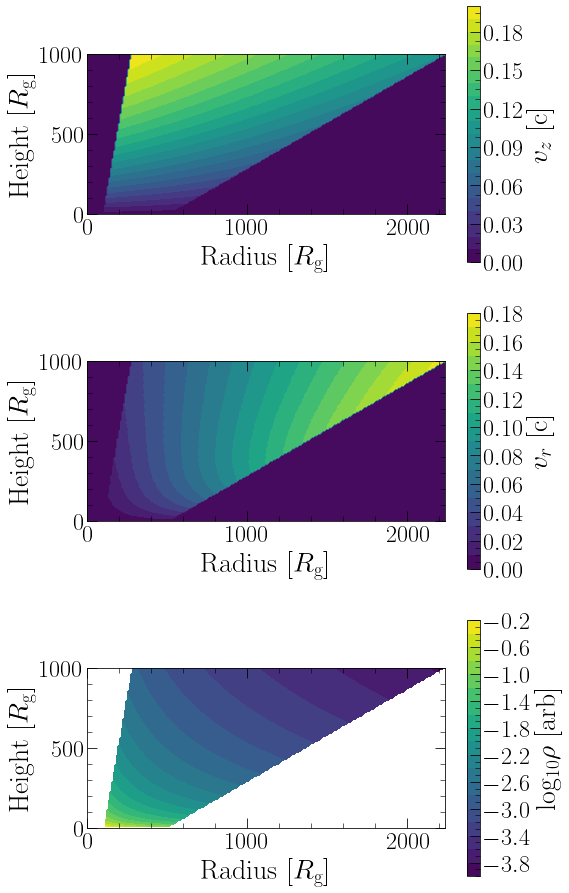

In [14]:
alt_BLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)
alt_BLR.Add_SL_bounded_region(SL1, SL3)

R, Z = np.meshgrid(alt_BLR.r_vals, alt_BLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (alt_BLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r"$v_{z}$ [c]")

conts2 = ax[1].contourf(R, Z, (alt_BLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r"$v_{r}$ [c]")


conts3 = ax[2].contourf(R, Z, np.log10(alt_BLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r"log$_{10} \rho$ [arb]")
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.show()

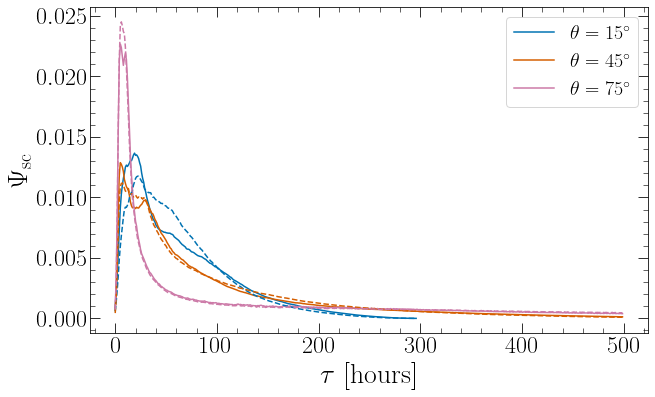

In [15]:
TF1_alt = alt_BLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2_alt = alt_BLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3_alt = alt_BLR.Scattering_BLR_TF(theta3, scaleratio=15)

lim = 500

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1_extra[:lim], label=r"$\theta = " + str(theta1) + r"^{\circ}$")
ax.plot(TF2_extra[:lim], label=r"$\theta = " + str(theta2) + r"^{\circ}$")
ax.plot(TF3_extra[:lim], label=r"$\theta = " + str(theta3) + r"^{\circ}$")

plt.gca().set_prop_cycle(None)  # reset color cycle
ax.plot(TF1_alt[:lim], "--")  # add new TFs to plot as dashed lines
ax.plot(TF2_alt[:lim], "--")
ax.plot(TF3_alt[:lim], "--")

ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()

This may not look different as $\Psi$ was calculated using a density proxy, proportional to $\nabla v_{\rm{poloidal}} r^{-1}$. Comparing velocity slices can be used to model broad lines leaking into an observational filter, and show a different story.

/usr/local/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


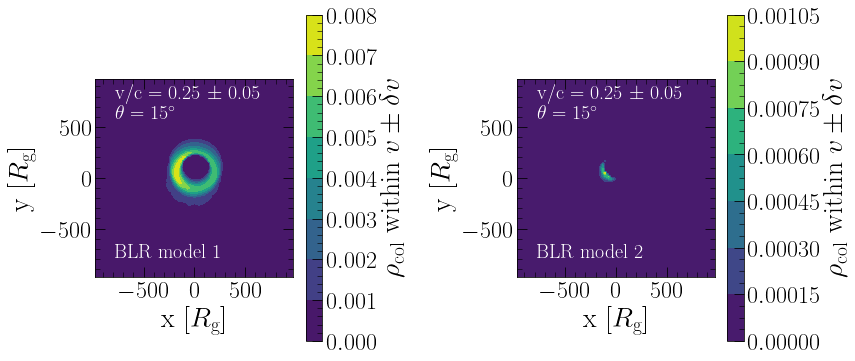

In [16]:
vel_centroid = 0.25  # units c
delta_vel = 0.05  # +/- units c
inc_ang = 15  # deg

vel_slice_1 = testingBLR.Project_BLR_velocity_slice(inc_ang, vel_centroid, delta_vel)
vel_slice_2 = alt_BLR.Project_BLR_velocity_slice(inc_ang, vel_centroid, delta_vel)

rescale_vel_slice_1 = rescale(vel_slice_1, 30)
rescale_vel_slice_2 = rescale(vel_slice_2, 30)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
contours1 = ax[0].contourf(x_vals, y_vals, rescale_vel_slice_1)
contours2 = ax[1].contourf(x_vals, y_vals, rescale_vel_slice_2)
plt.colorbar(contours1, ax=ax[0], label=r"$\rho_{\rm{col}}$ within $v \pm \delta v$")
plt.colorbar(contours2, ax=ax[1], label=r"$\rho_{\rm{col}}$ within $v \pm \delta v$")

for axis in ax:
    axis.set_xlabel(r"x [$R_{\rm{g}}$]")
    axis.set_ylabel(r"y [$R_{\rm{g}}$]")
    axis.set_aspect(1)

ax[0].text(
    -0.8 * np.max(x_vals),
    0.8 * np.max(y_vals),
    r"v/c = " + str(vel_centroid) + r" $\pm$ " + str(delta_vel),
    color="white",
    fontsize=20,
)
ax[0].text(
    -0.8 * np.max(x_vals),
    0.6 * np.max(y_vals),
    r"$\theta = " + str(inc_ang) + r"^{\circ}$ ",
    color="white",
    fontsize=20,
)
ax[1].text(
    -0.8 * np.max(x_vals),
    0.8 * np.max(y_vals),
    r"v/c = " + str(vel_centroid) + r" $\pm$ " + str(delta_vel),
    color="white",
    fontsize=20,
)
ax[1].text(
    -0.8 * np.max(x_vals),
    0.6 * np.max(y_vals),
    r"$\theta = " + str(inc_ang) + r"^{\circ}$ ",
    color="white",
    fontsize=20,
)

ax[0].text(
    -0.8 * np.max(x_vals),
    -0.8 * np.max(y_vals),
    "BLR model 1",
    color="white",
    fontsize=20,
)
ax[1].text(
    -0.8 * np.max(x_vals),
    -0.8 * np.max(y_vals),
    "BLR model 2",
    color="white",
    fontsize=20,
)


plt.subplots_adjust(wspace=0.7)
plt.show()

Now making a more complex BLR geometry...

<ipython-input-17-00ba65070527>:48: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(comp_BLR.density_grid.T), 20)


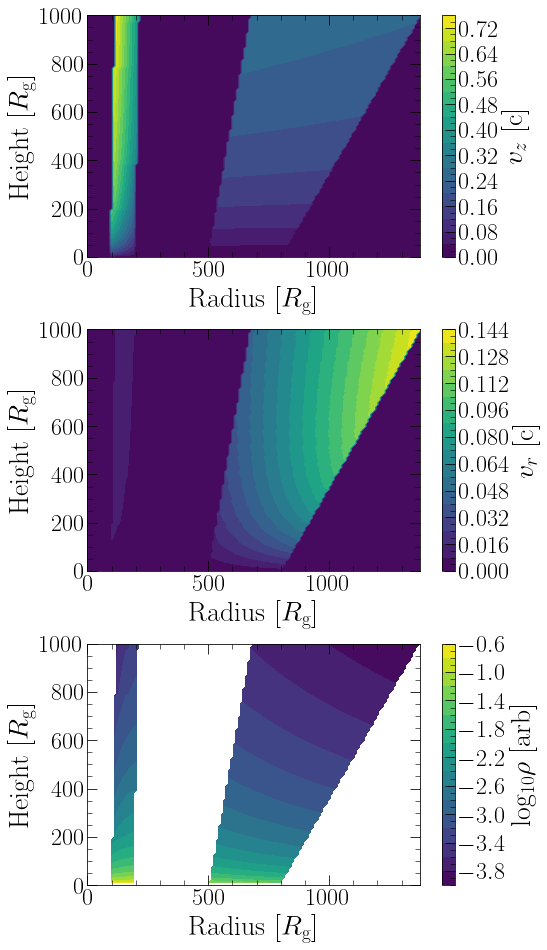

In [17]:
zmax = 1000  # R_g
mexp = 8.0
sl1_rlaunch = 100  # R_g
sl2_rlaunch = 200
sl1_theta = 1  # deg
sl2_theta = 1
sl1_char_dist = 100  # R_g
sl2_char_dist = 200
sl1_asy_vel = 0.8  # v/c
sl2_asy_vel = 0.5

sl3_rlaunch = 500  # R_g
sl4_rlaunch = 800
sl3_theta = 10  # deg
sl4_theta = 30
sl3_char_dist = 500  # R_g
sl4_char_dist = 500
sl3_asy_vel = 0.4  # v/c
sl4_asy_vel = 0.4


comp_BLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)

SL1 = Amoeba.Streamline(sl1_rlaunch, sl1_theta, zmax, sl1_char_dist, mexp, sl1_asy_vel)
SL2 = Amoeba.Streamline(sl2_rlaunch, sl2_theta, zmax, sl2_char_dist, mexp, sl2_asy_vel)
SL3 = Amoeba.Streamline(sl3_rlaunch, sl3_theta, zmax, sl3_char_dist, mexp, sl3_asy_vel)
SL4 = Amoeba.Streamline(sl4_rlaunch, sl4_theta, zmax, sl4_char_dist, mexp, sl4_asy_vel)

comp_BLR.Add_SL_bounded_region(SL1, SL2, density_init_weight=3)
comp_BLR.Add_SL_bounded_region(SL3, SL4, density_init_weight=1)

R, Z = np.meshgrid(comp_BLR.r_vals, comp_BLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (comp_BLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r"$v_{z}$ [c]")

conts2 = ax[1].contourf(R, Z, (comp_BLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r"$v_{r}$ [c]")


conts3 = ax[2].contourf(R, Z, np.log10(comp_BLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r"log$_{10} \rho$ [arb]")
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.subplots_adjust(hspace=0.3)
fig.savefig("ComplexBLRGeometry.pdf")
plt.show()

<ipython-input-18-75c608789f9d>:9: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)


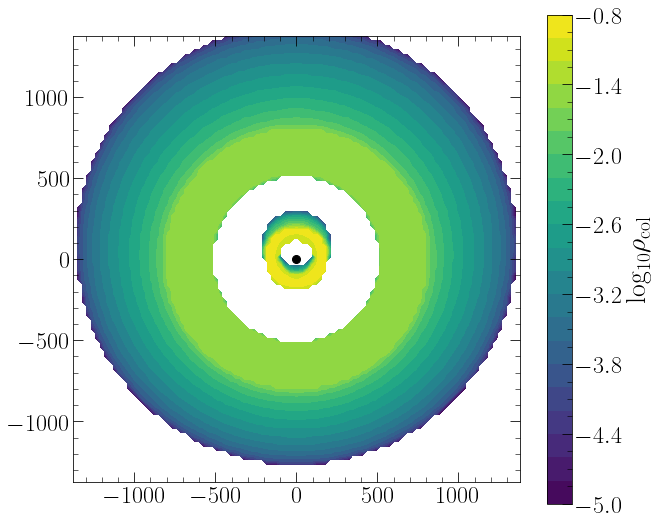

In [18]:
inc_ang = 5
projection = comp_BLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi / 180
x_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 1))

fig, ax = plt.subplots(figsize=(10, 9))
ax.plot([0], [0], "k.", markersize=16)
contours = ax.contourf(x_vals, y_vals, np.log10(projection), 20)
cbar = plt.colorbar(contours, ax=ax, label=r"log$_{10}\rho_{\rm{col}}$")
ax.set_aspect(1)
plt.show()

<ipython-input-19-cbad4efbd9f0>:9: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)


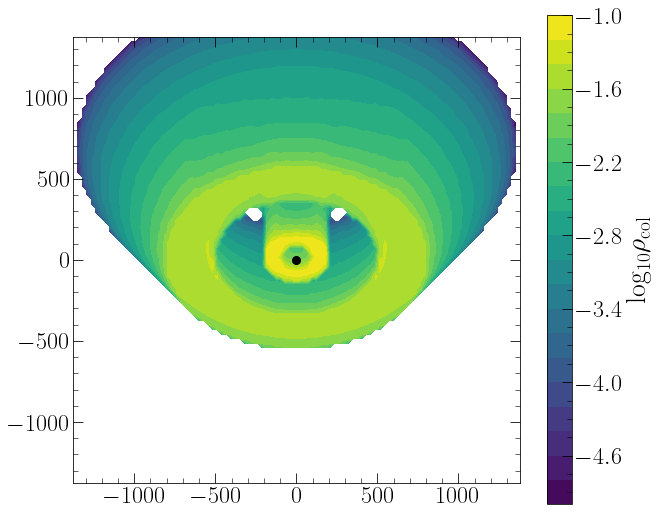

In [19]:
inc_ang = 45
projection = comp_BLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi / 180
x_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 1))

fig, ax = plt.subplots(figsize=(10, 9))
ax.plot([0], [0], "k.", markersize=16)
contours = ax.contourf(x_vals, y_vals, np.log10(projection), 20)
cbar = plt.colorbar(contours, ax=ax, label=r"log$_{10}\rho_{\rm{col}}$")
ax.set_aspect(1)
# fig.savefig("ComplexBLRColumnDensity.pdf")
plt.show()

<ipython-input-20-2d73e3ac773f>:9: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)


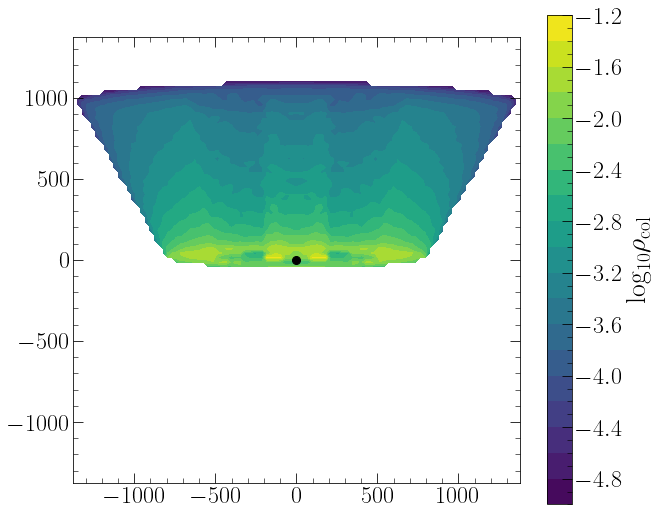

In [20]:
inc_ang = 85
projection = comp_BLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi / 180
x_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 1))

fig, ax = plt.subplots(figsize=(10, 9))
ax.plot([0], [0], "k.", markersize=16)
contours = ax.contourf(x_vals, y_vals, np.log10(projection), 20)
cbar = plt.colorbar(contours, ax=ax, label=r"log$_{10}\rho_{\rm{col}}$")
ax.set_aspect(1)
plt.show()

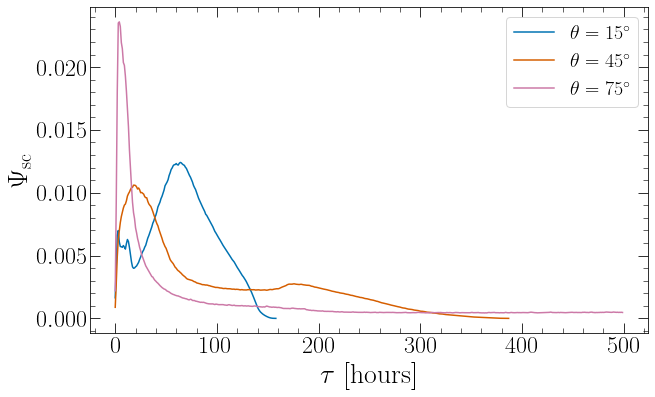

In [21]:
TF1_comp = comp_BLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2_comp = comp_BLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3_comp = comp_BLR.Scattering_BLR_TF(theta3, scaleratio=15)

lim = 500

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1_comp[:lim], label=r"$\theta = " + str(theta1) + r"^{\circ}$")
ax.plot(TF2_comp[:lim], label=r"$\theta = " + str(theta2) + r"^{\circ}$")
ax.plot(TF3_comp[:lim], label=r"$\theta = " + str(theta3) + r"^{\circ}$")


ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()

In [22]:
vel_centroid = 0.0  # units c
delta_vel = 0.3  # +/- units c
inc_ang = 45  # deg
scalefactor = 30

rescale_projection = rescale(comp_BLR.Project_BLR_density(inc_ang), scalefactor)
rescale_vel_slice = rescale(
    comp_BLR.Project_BLR_velocity_slice(inc_ang, vel_centroid, delta_vel), scalefactor
)

x_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(rescale_projection, 0))
y_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(rescale_projection, 1))

/usr/local/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<ipython-input-23-e7f4ee974e31>:9: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(x_vals, y_vals, np.log10(rescale_projection), 20, alpha=0.2)


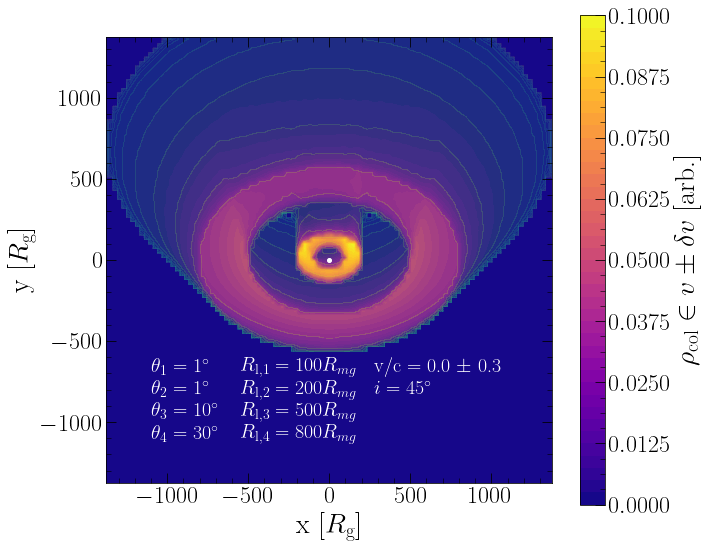

In [23]:
xalign1 = -0.8 * np.max(x_vals)
xalign2 = -0.4 * np.max(x_vals)
xalign3 = 0.2 * np.max(x_vals)
yalign = -0.5 * np.max(y_vals)
deltay = 0.1 * np.max(y_vals)

fig, ax = plt.subplots(figsize=(10, 9))
contours = ax.contourf(x_vals, y_vals, rescale_vel_slice, 40, cmap="plasma")
ax.contourf(x_vals, y_vals, np.log10(rescale_projection), 20, alpha=0.2)
cbar = plt.colorbar(
    contours, ax=ax, label=r"$\rho_{\rm{col}} \in v \pm \delta v$ [arb.]"
)
ax.plot([0], [0], "w.-", markersize=8)
ax.set_xlabel(r"x [$R_{\rm{g}}$]")
ax.set_ylabel(r"y [$R_{\rm{g}}$]")

ax.text(
    xalign1,
    yalign - 0 * deltay,
    r"$\theta_{1} = " + str(sl1_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 1 * deltay,
    r"$\theta_{2} = " + str(sl2_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 2 * deltay,
    r"$\theta_{3} = " + str(sl3_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign1,
    yalign - 3 * deltay,
    r"$\theta_{4} = " + str(sl4_theta)[:3] + "^{\circ}$",
    color="white",
    fontsize=20,
)


ax.text(
    xalign2,
    yalign - 0 * deltay,
    r"$R_{\rm{l, 1}} = " + str(sl1_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign2,
    yalign - 1 * deltay,
    r"$R_{\rm{l, 2}} = " + str(sl2_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign2,
    yalign - 2 * deltay,
    r"$R_{\rm{l, 3}} = " + str(sl3_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)
ax.text(
    xalign2,
    yalign - 3 * deltay,
    r"$R_{\rm{l, 4}} = " + str(sl4_rlaunch)[:3] + " R_{\rm{g}}$",
    color="white",
    fontsize=20,
)


ax.text(
    xalign3,
    yalign - 0 * deltay,
    r"v/c = " + str(vel_centroid) + r" $\pm$ " + str(delta_vel),
    color="white",
    fontsize=20,
)
ax.text(
    xalign3,
    yalign - 1 * deltay,
    r"$i = " + str(inc_ang) + r"^{\circ}$ ",
    color="white",
    fontsize=20,
)


ax.set_aspect(1)
# fig.savefig("ComplexBLRMedVelSlice.pdf")
plt.show()